In [20]:
import onnx
import numpy as np
import tvm
import imageio
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tvm import te
from tvm import relay, transform
from tvm.contrib import graph_executor as runtime
import requests
from bs4 import BeautifulSoup
from PIL 
import Image
import io
from pathlib import Path
import logging
logging.basicConfig(level=logging.DEBUG)

In [2]:
model_path = Path.cwd().parent / 'models' / 'insightface_attributes' / 'genderage.onnx'
model_path.exists()

True

In [3]:
onnx_model = onnx.load(str(model_path))

In [4]:
onnx_model.graph.input

[name: "data"
type {
  tensor_type {
    elem_type: 1
    shape {
      dim {
        dim_param: "None"
      }
      dim {
        dim_value: 3
      }
      dim {
        dim_value: 96
      }
      dim {
        dim_value: 96
      }
    }
  }
}
]

In [149]:
target = "llvm"

input_name = "data"
input_dtype = "float32"
input_shape = (1, 3, 96, 96)
shape_dict = {input_name: input_shape}
mod, params = relay.frontend.from_onnx(onnx_model, shape_dict, freeze_params=True)

target = "llvm"
with transform.PassContext(opt_level=3):
    lib = relay.build(mod, target, params=params)
    lib.export_library(str(model_path.with_suffix(".so")))

DEBUG:Common:Attribute momentum is ignored in relay.sym.batch_norm
DEBUG:Common:Attribute momentum is ignored in relay.sym.batch_norm
DEBUG:Common:Attribute momentum is ignored in relay.sym.batch_norm
DEBUG:Common:Attribute momentum is ignored in relay.sym.batch_norm
DEBUG:Common:Attribute momentum is ignored in relay.sym.batch_norm
DEBUG:Common:Attribute momentum is ignored in relay.sym.batch_norm
DEBUG:Common:Attribute momentum is ignored in relay.sym.batch_norm
DEBUG:Common:Attribute momentum is ignored in relay.sym.batch_norm
DEBUG:Common:Attribute momentum is ignored in relay.sym.batch_norm
DEBUG:Common:Attribute momentum is ignored in relay.sym.batch_norm
DEBUG:Common:Attribute momentum is ignored in relay.sym.batch_norm
DEBUG:Common:Attribute momentum is ignored in relay.sym.batch_norm
DEBUG:Common:Attribute momentum is ignored in relay.sym.batch_norm
DEBUG:Common:Attribute momentum is ignored in relay.sym.batch_norm
DEBUG:Common:Attribute momentum is ignored in relay.sym.batch_

INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:compile_engine:Using injective.cpu for sqrt based on highest priority (10)
INFO:compile_engine:Using injective.cpu for divide based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for negative based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:compile_engine:Using injective.cpu for sqrt based on highest priority (10)
INFO:compile_engine:Using injective.cpu for divide based on highest priority (10)
INFO:compile_

INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:compile_engine:Using injective.cpu for sqrt based on highest priority (10)
INFO:compile_engine:Using injective.cpu for divide based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for negative based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:compile_engine:Using injective.cpu for sqrt based on highest priority (10)
INFO:compile_engine:Using injective.cpu for divide based on highest priority (10)
INFO:compile_

INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:compile_engine:Using injective.cpu for sqrt based on highest priority (10)
INFO:compile_engine:Using injective.cpu for divide based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for negative based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for squeeze based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)


INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
INFO:compile_engine:Using injective.cpu for squeeze based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for multiply based on highest priority (10)
DEBUG:autotvm:Cannot find tuning records for:
    target=llvm -keys=cpu -link-params=0
    key=('conv2d_NCHWc.x86', ('TENSOR', (1, 3, 96, 96), 'float32'), ('TENSOR', (16, 3, 3, 3), 'float32'), (2, 2), (1, 1, 1, 1), (1, 1), 'NCHW', 'NCHW', 'float32')
TVM will apply a default schedule which may negatively impact performance.
INFO:compile_engine:Using conv2d_nchw.x86 for nn.conv2d based on highest priority (10)
DEBUG:autotvm:Cannot find tuning records for:
    target=llvm -keys=cpu -link-params=0
    key=('depthwise_conv2d_NCHWc.x86', ('TENSOR', (1, 16, 48, 48), 'float32'

INFO:compile_engine:Using conv2d_nchw.x86 for nn.conv2d based on highest priority (10)
DEBUG:autotvm:Cannot find tuning records for:
    target=llvm -keys=cpu -link-params=0
    key=('depthwise_conv2d_NCHWc.x86', ('TENSOR', (1, 256, 3, 3), 'float32'), ('TENSOR', (256, 1, 3, 3), 'float32'), (1, 1), (1, 1, 1, 1), (1, 1), 'NCHW', 'NCHW', 'float32')
TVM will apply a default schedule which may negatively impact performance.
INFO:compile_engine:Using depthwise_conv2d_nchw.x86 for nn.conv2d based on highest priority (10)
DEBUG:autotvm:Cannot find tuning records for:
    target=llvm -keys=cpu -link-params=0
    key=('conv2d_NCHWc.x86', ('TENSOR', (1, 256, 3, 3), 'float32'), ('TENSOR', (256, 256, 1, 1), 'float32'), (1, 1), (0, 0, 0, 0), (1, 1), 'NCHW', 'NCHW', 'float32')
TVM will apply a default schedule which may negatively impact performance.
INFO:compile_engine:Using conv2d_nchw.x86 for nn.conv2d based on highest priority (10)
INFO:compile_engine:Using dense_pack.x86 for nn.dense based on hi

INFO:compile_engine:Using injective.cpu for layout_transform based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for layout_transform based on highest priority (10)
INFO:compile_engine:Using injective.cpu for layout_transform based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for layout_transform based on highest priority (10)
INFO:compile_engine:Using injective.cpu for layout_transform based on highest priority (10)
INFO:compile_engine:Using injective.cpu for layout_transform based on highest priority (10)
INFO:compile_engine:Using injective.cpu for expand_dims based on highest priority (10)
INFO:compile_engine:Using injective.cpu for layout_transform based on highest priority (10)
INFO:compile_engine:Using injective.cpu for layout_transform based on highest priority (10)
INF

DEBUG:autotvm:Cannot find tuning records for:
    target=llvm -keys=cpu -link-params=0
    key=('conv2d_NCHWc.x86', ('TENSOR', (1, 8, 12, 12, 8), 'float32'), ('TENSOR', (8, 8, 1, 1, 8, 8), 'float32'), (1, 1), (0, 0, 0, 0), (1, 1), 'NCHW8c', 'NCHW8c', 'float32')
TVM will apply a default schedule which may negatively impact performance.
INFO:compile_engine:Using conv2d_NCHWc.x86 for nn.contrib_conv2d_NCHWc based on highest priority (10)
INFO:compile_engine:Using injective.cpu for add based on highest priority (10)
INFO:compile_engine:Using injective.cpu for nn.relu based on highest priority (10)
DEBUG:autotvm:Cannot find tuning records for:
    target=llvm -keys=cpu -link-params=0
    key=('depthwise_conv2d_NCHWc.x86', ('TENSOR', (1, 8, 12, 12, 8), 'float32'), ('TENSOR', (8, 1, 3, 3, 1, 8), 'float32'), (2, 2), (1, 1, 1, 1), (1, 1), 'NCHW8c', 'NCHW8c', 'float32')
TVM will apply a default schedule which may negatively impact performance.
INFO:compile_engine:Using depthwise_conv2d_NCHWc.x86

In [150]:
# Create a runtime executor module
module = runtime.GraphModule(lib["default"](tvm.cpu()))

In [151]:
onnx_model.graph.output

[name: "fc1"
type {
  tensor_type {
    elem_type: 1
    shape {
      dim {
        dim_value: 1
      }
      dim {
        dim_value: 3
      }
    }
  }
}
]

In [163]:
def get_image():
    r = requests.get('https://thispersondoesnotexist.com/image')
    image = np.asarray(Image.open(io.BytesIO(r.content)))
    return image

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): thispersondoesnotexist.com:443
DEBUG:urllib3.connectionpool:https://thispersondoesnotexist.com:443 "GET /image HTTP/1.1" 200 589268


[ 0.29991528 -0.29988113  0.3537375 ]


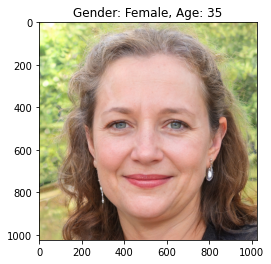

In [174]:
original_image = get_image()
image = cv2.resize(original_image, (96, 96), cv2.INTER_LINEAR_EXACT)
image = image.astype(np.float32)
image = (image - 127.5) / 128.0
image_data = np.transpose(image, (2, 0, 1))
image_data = image_data[np.newaxis, :]
module.set_input("data", tvm.nd.array(image_data))
module.run()
pred = np.squeeze(module.get_output(0).numpy())
age = int(np.round(pred[2]*100))
gender = "Female" if np.argmax(pred[:2]) == 0 else "Male"
print(pred)
plt.imshow(original_image)
plt.title(f"Gender: {gender}, Age: {age}")
plt.show()